In [11]:
import pandas as pd
df = pd.read_pickle("../../data/anno_sps_df")
df.columns.values

array(['index', 'Taxon ID', 'Genome ID', 'Genome Name', 'Antibiotic',
       'Resistant Phenotype', 'Measurement', 'Measurement Sign',
       'Measurement Value', 'Measurement Unit', 'Laboratory Typing Method',
       'Laboratory Typing Method Version', 'Laboratory Typing Platform',
       'Vendor', 'Testing Standard', 'Testing Standard Year', 'Source',
       'Species'], dtype=object)

In [15]:
df.loc[df['Species'].isnull()] # What we don't want

,index,Taxon ID,Genome ID,Genome Name,Antibiotic,Resistant Phenotype,Measurement,Measurement Sign,Measurement Value,Measurement Unit,Laboratory Typing Method,Laboratory Typing Method Version,Laboratory Typing Platform,Vendor,Testing Standard,Testing Standard Year,Source,Species
416,725,1439331,1.43933e+06,Lelliottia amnigena CHS 78,ertapenem,Intermediate,NaN,NaN,nan,NaN,MIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,1468,83655,83655.1,Leclercia adecarboxylata strain USDA-ARS-USMAR...,tylosin,NaN,>32,>,32,mg/L,MIC,BOPO6F plate; cattle host,Sensititre,TREK Diagnostic Systems,CLSI,NaN,NaN,NaN
1133,1994,83655,83655.1,Leclercia adecarboxylata strain USDA-ARS-USMAR...,spectinomycin,NaN,==16,==,16,mg/L,MIC,BOPO6F plate; cattle host,Sensititre,TREK Diagnostic Systems,CLSI,NaN,NaN,NaN
1193,2102,83655,83655.1,Leclercia adecarboxylata strain USDA-ARS-USMAR...,sulfadimethoxine,NaN,<=256,<=,256,mg/L,MIC,BOPO6F plate; cattle host,Sensititre,TREK Diagnostic Systems,CLSI,NaN,NaN,NaN
2058,3614,1328337,1.32834e+06,Hafnia alvei BIDMC 31,cefepime,Resistant,>32,>,32,mg/L,MIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2287,4012,1439331,1.43933e+06,Lelliottia amnigena CHS 78,tigecycline,Susceptible,NaN,NaN,nan,NaN,MIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2466,4339,1328337,1.32834e+06,Hafnia alvei BIDMC 31,ciprofloxacin,Susceptible,<=.25,<=,.25,mg/L,MIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545,4481,83655,83655.1,Leclercia adecarboxylata strain USDA-ARS-USMAR...,tilmicosin,NaN,==32,==,32,mg/L,MIC,BOPO6F plate; cattle host,Sensititre,TREK Diagnostic Systems,CLSI,NaN,NaN,NaN
2722,4773,83655,83655.1,Leclercia adecarboxylata strain USDA-ARS-USMAR...,ceftiofur,NaN,==0.5,==,0.5,mg/L,MIC,BOPO6F plate; cattle host,Sensititre,TREK Diagnostic Systems,CLSI,NaN,NaN,NaN
2924,5128,1328337,1.32834e+06,Hafnia alvei BIDMC 31,ceftazidime,Resistant,>32,>,32,mg/L,MIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
group_sps = df.groupby(['Species', 'Resistant Phenotype', 'Antibiotic']).count()
group_sps.to_excel("../../data/describe_data.xlsx")


In [42]:
group_pheno = df.groupby(['Resistant Phenotype', 'Antibiotic']).count()['index']
I = list(group_pheno['Intermediate'])
S = list(group_pheno['Susceptible'])
R = list(group_pheno['Resistant'])
not_S = list(group_pheno['Non-susceptible'])
not_R = list(group_pheno['Not defined'])
drug_list = list(group_pheno['Intermediate'].index)

group = pd.DataFrame([R, not_S, I, not_R, S], columns = drug_list, index = ['R', 'not_S', 'I', 'not_R', 'S']).fillna(0)

In [61]:
group.mean(axis = 1)


R        79.029851
not_S    15.014925
I        81.477612
not_R     3.044776
S        58.044776
dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

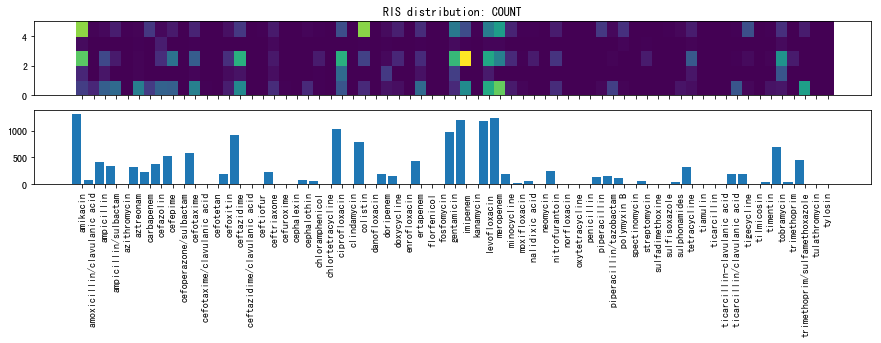

In [64]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
f, axarr = plt.subplots(2, sharex=True, figsize = (15,3))

plt.setp(axarr, xticks=np.arange(0.5, len(group.columns), 1), xticklabels=drug_list)
axarr[0].pcolor(group)
axarr[0].set_title('RIS distribution: COUNT')


x = np.arange(len(drug_list))
axarr[1].bar(x, group.sum())
plt.setp(plt.xticks()[1], rotation=90)


    
